In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('fivethirtyeight')
%matplotlib inline 

In [2]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-21-2020.csv')

In [3]:
latest_data.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-04-21 23:30:50,34.223334,-82.461707,17,0,0,17,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-04-21 23:30:50,30.295065,-92.414197,114,7,0,107,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-04-21 23:30:50,37.767072,-75.632346,52,0,0,52,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-04-21 23:30:50,43.452658,-116.241552,616,12,0,604,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-04-21 23:30:50,41.330756,-94.471059,1,0,0,1,"Adair, Iowa, US"


In [4]:
latest_data.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-04-21 23:30:50,34.223334,-82.461707,17,0,0,17,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-04-21 23:30:50,30.295065,-92.414197,114,7,0,107,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-04-21 23:30:50,37.767072,-75.632346,52,0,0,52,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-04-21 23:30:50,43.452658,-116.241552,616,12,0,604,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-04-21 23:30:50,41.330756,-94.471059,1,0,0,1,"Adair, Iowa, US"


In [5]:
cols = confirmed_df.keys()

In [6]:
confirmed_df.loc[:,cols[-1]]#Prueba para extraer datos

0      10582
1        998
2       8306
3        762
4         69
       ...  
261      251
262      222
263       87
264     2929
265        2
Name: 5/24/20, Length: 266, dtype: int64

In [7]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,6053,6402,6664,7072,7653,8145,8676,9216,9998,10582
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,916,933,946,948,949,964,969,981,989,998
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,6629,6821,7019,7201,7377,7542,7728,7918,8113,8306
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,761,761,761,761,761,762,762,762,762,762
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,48,48,48,50,52,52,58,60,61,69


In [8]:
confirmed = confirmed_df.loc[:,cols[4]:cols[-1]]#array of numbers
deaths = deaths_df.loc[:,cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:,cols[4]:cols[-1]]

In [9]:
#Case of study
#TOTALS
dates = confirmed.keys()
world_cases = []
total_deaths = []
#RATES
mortality_rate = []
recovery_rate = []
#ACTIVES AND RECOVEREDS
total_recovered = []
total_active = []

#COUNTRIES ANALYSIS
china_cases = []
italy_cases = []
us_cases = []
spain_cases = []
france_cases = []
germany_cases = []
uk_cases = []
mex_cases = []

china_deaths = []
italy_deaths = []
us_deaths = []
spain_deaths = []
france_deaths = []
germany_deaths = []
uk_deaths = []
mex_deaths = []

china_recoveries = []
italy_recoveries = []
us_recoveries = []
spain_recoveries = []
france_recoveries = []
germany_recoveries = []
uk_recoveries = []
mex_recoveries = []

for i in dates:
    #sum all de cases in all the countries in each date
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()

    # confirmed, deaths, recovered, and active
    
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    #calculate rates
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)
    
    #case studies
    #CONFIRMATIONS
    #filtering first by country and then by date 
    china_cases.append(confirmed_df[confirmed_df['Country/Region'] =='China'][i].sum())
    italy_cases.append(confirmed_df[confirmed_df['Country/Region'] == 'Italy'][i].sum())
    us_cases.append(confirmed_df[confirmed_df['Country/Region'] == 'US'][i].sum())
    spain_cases.append(confirmed_df[confirmed_df['Country/Region']=='Spain'][i].sum())
    france_cases.append(confirmed_df[confirmed_df['Country/Region']=='France'][i].sum())
    germany_cases.append(confirmed_df[confirmed_df['Country/Region']=='Germany'][i].sum())
    uk_cases.append(confirmed_df[confirmed_df['Country/Region']=='United Kingdom'][i].sum())
    mex_cases.append(confirmed_df[confirmed_df['Country/Region']=='Mexico'][i].sum())
    
    #DEATHS
    china_deaths.append(deaths_df[deaths_df['Country/Region']=='China'][i].sum())
    italy_deaths.append(deaths_df[deaths_df['Country/Region']=='Italy'][i].sum())
    us_deaths.append(deaths_df[deaths_df['Country/Region']=='US'][i].sum())
    spain_deaths.append(deaths_df[deaths_df['Country/Region']=='Spain'][i].sum())
    france_deaths.append(deaths_df[deaths_df['Country/Region']=='France'][i].sum())
    germany_deaths.append(deaths_df[deaths_df['Country/Region']=='Germany'][i].sum())
    uk_deaths.append(deaths_df[deaths_df['Country/Region']=='United Kingdom'][i].sum())
    mex_deaths.append(deaths_df[deaths_df['Country/Region']=='Mexico'][i].sum())
    
    #RECOVERIES
    china_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='China'][i].sum())
    italy_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Italy'][i].sum())
    us_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='US'][i].sum())
    spain_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Spain'][i].sum())
    france_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='France'][i].sum())
    germany_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Germany'][i].sum())
    uk_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='United Kingdom'][i].sum())
    mex_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Mexico'][i].sum())

Getting daily increases

In [17]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1,1)#Vector fila para cada elemento del array
world_cases = np.array(world_cases.reshape(-1,1))
total_deaths = np.array(total_deaths).reshape(-1,1)
total_recovered = np.array(total_recovered).reshape(-1,1)

Future forecasting

In [18]:
days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1,1)
adjusted_dates = future_forcast[:-10]

In [23]:
start = '1/22/2020' # Preparamos el tiempo tanto del formato a predecir como del que tenemos 
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y') )

In [28]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22,world_cases,test_size=0.07, shuffle=False)

In [38]:
#use this to find the optimal parameters for SVR
#c = [0.01, 0.1, 1]
#gamma = [0.01, 0.1, 1]
#epsilon = [0.01, 0.1, 1]
#shrinking = [True, False]
#degree = [3, 4, 5, 6, 7]

#svm_grid = {'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking' : shrinking, 'degree': degree}

#svm = SVR(kernel='poly')
#svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=30, verbose=1)
#svm_search.fit(X_train_confirmed, y_train_confirmed)

In [39]:
# svm_search.best_params_

In [40]:
#svm_confirmed = svm_search.best_estimator_
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01,epsilon=1,degree = 4, C = 0.1)
svm_confirmed.fit(X_train_confirmed,y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)

c:\users\ralph\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE: 1481663.8440699833
MSE: 2288699314640.588


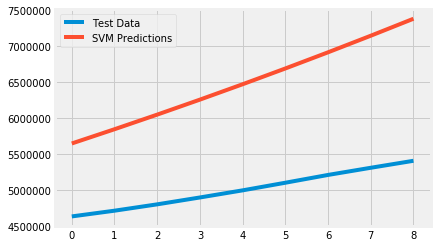

In [41]:
# check against testing data
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))